In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
# load paths 
TRAIN_IMG_PATH = "/Users/anthony/Documents/Comp551_KaggleData/train_images.npy"
TRAIN_LAB_PATH = "/Users/anthony/Documents/Comp551_KaggleData/train_labels.csv"

In [3]:
images = np.load(TRAIN_IMG_PATH, encoding='bytes')
images.shape

(10000, 2)

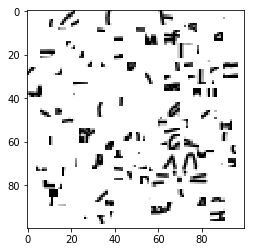

In [177]:
idx = 5000
tmpImg = images[idx][1].reshape((100,100)).astype(np.uint8)

plt.imshow(tmpImg, cmap='gray_r')
plt.show()

### Try stuff with filters

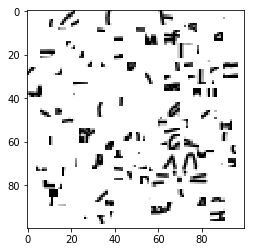

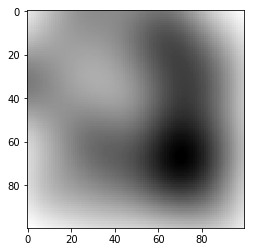

In [178]:
from skimage import filters

# Gaussian filter
filteredImg = filters.gaussian(tmpImg, sigma=13.0)
#filteredImg = filters.median(filteredImg)
#filteredImg = filters.hessian(filteredImg)


plt.imshow(tmpImg, cmap='gray_r')
plt.show()

plt.imshow(filteredImg, cmap='gray_r')
plt.show()

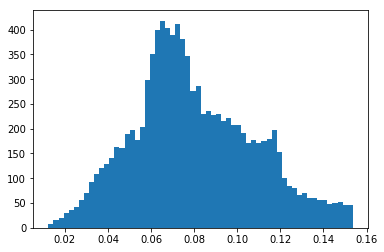

In [179]:
plt.hist(filteredImg.flatten(), bins=60)
plt.show()

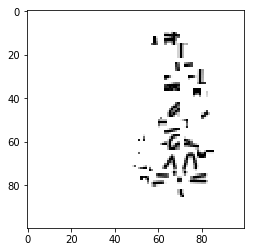

In [180]:
percentilePixelIntensity = np.percentile(filteredImg.flatten(), 80)

percentileExtractedImg = np.multiply( tmpImg, (filteredImg > percentilePixelIntensity) )

plt.imshow(percentileExtractedImg, cmap='gray_r')
plt.show()

### Old stuff with contours

27


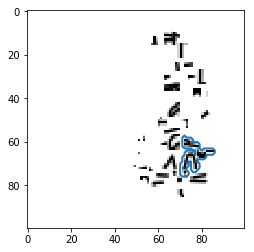

In [182]:
# Try to find contours
from skimage import measure

CUR_IMG = percentileExtractedImg

tmpImg_contours = measure.find_contours(CUR_IMG, 0.8)
print(len(tmpImg_contours))

# Display the image and plot all contours found
plt.imshow(CUR_IMG, cmap='gray_r')

# Find the longest contour
longestCont_i = -1
longestCont_len = 0
for i, contour in enumerate(tmpImg_contours):
    if len(contour) > longestCont_len:
        longestCont_i = i
        longestCont_len = len(contour)
        
# Plot the longest contour
longestCont = tmpImg_contours[longestCont_i]
plt.plot(longestCont[:, 1], longestCont[:, 0], linewidth=2)

plt.show()

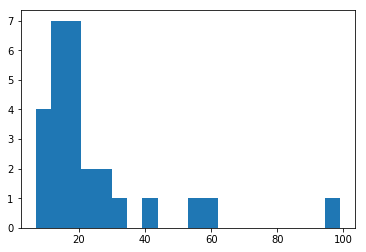

In [183]:
# histogram of contours to find potentially noise

contour_lengths = np.zeros(len(tmpImg_contours))

for i, contour in enumerate(tmpImg_contours):
    contour_lengths[i] = float(len(contour))

plt.hist(contour_lengths, bins=20)
plt.show()

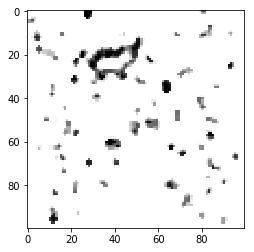

In [77]:
# Use some sort of naive filter (deprecated)
from skimage import filters

med_filter_tmpImg = filters.median(tmpImg, np.ones((3, 3)))

plt.imshow(med_filter_tmpImg, cmap='gray_r')
plt.show()

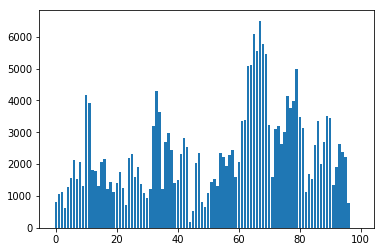

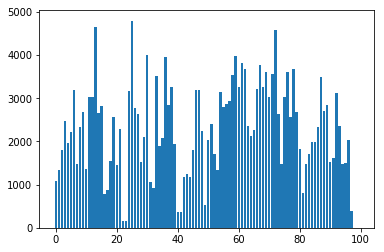

In [113]:
# Plot horizontal histogram
hori_sum = np.sum(tmpImg, axis=0)
plt.bar(range(len(hori_sum)), hori_sum)
plt.show()

# Plot vertical histogram
verti_sum = np.sum(tmpImg, axis=1)
plt.bar(range(len(verti_sum)), verti_sum)
plt.show()

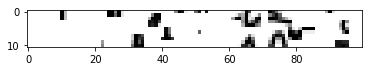

In [114]:
tmpSubImg = tmpImg[59:70,:]

plt.imshow(tmpSubImg, cmap='gray_r')
plt.show()

### Try to extract via edges

In [135]:
import skimage as ski
from skimage import feature

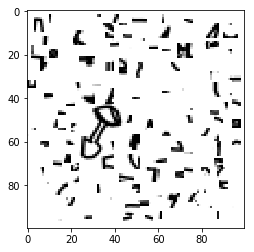

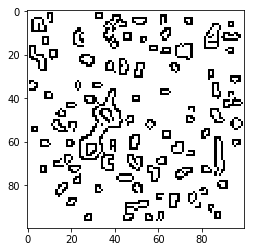

In [136]:
edge_img = feature.canny(tmpImg, sigma=1)

plt.imshow(tmpImg, cmap='gray_r')
plt.show()

plt.imshow(edge_img, cmap='gray_r')
plt.show()